# **3. Persamaan Diferensial Orde-$n$**

> Gabriel Jonathan (gabejonathan29@gmail.com)

## **3.1 Solusi PDB Orde-$n$**

Seperti pada praktikum sebelumnya, persamaan diferensial biasa orde $n$ dapat diselesaikan dengan perintah `dsolve`. 

Contoh : Pandang MNA berikut
\begin{equation*}
2x'' + 3x' + 9x = e^{2t} \hspace{0.5cm}x(0) =1, x'(0)=2
\end{equation*}


In [ ]:
from sympy import *
from sympy.abc import t
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = Function('x')

sol = dsolve(2*Derivative(x(t), t, t) + 3*Derivative(x(t), t) 
            + 9*x(t) - pow(E, 2*t), x(t)).rhs # Cari solusi umum dari PD tersebut, ambil RHS nya
cond_1 = Eq(sol.subs(t, 0), 1)          # Kondisi 1
cond_2 = Eq(sol.diff(t).subs(t, 0), 2)  # Kondisi 2

C1, C2 = symbols("C1, C2") # Menyatakan C1 dan C2 sebagai simbol
C1C2_sol = solve([cond_1, cond_2], (C1, C2)) # Memperoleh nilai konstanta C1 dan C2 pada C1C2_sol
sol_1 = simplify(sol.subs(C1C2_sol)) # Substitusi nilai konstanta yang didapatkan pada solusi umum

print(sol_1)


(21*exp(11*t/4) + 242*sqrt(7)*sin(3*sqrt(7)*t/4) + 462*cos(3*sqrt(7)*t/4))*exp(-3*t/4)/483


Perhatikan bahwa objek hasil keluaran `dsolve` merupakan objek bertipe `Eq` atau Equality, dengan bentuk:
\begin{equation*}
\text{Eq(LHS, RHS)}
\end{equation*}
yang menyatakan LHS = RHS. Pada umumnya, solusi PD tersebut dituliskan pada RHS, sehingga untuk mengakses solusi $x(t)$ dari PD, kita perlu mengakses properti `.rhs` dari solusinya.

In [ ]:
sol_tanpa_rhs = dsolve(2*Derivative(x(t), t, t) + 3*Derivative(x(t), t) 
            + 9*x(t) - pow(E, 2*t), x(t))
print(sol_tanpa_rhs)
print(type(sol_tanpa_rhs))

Eq(x(t), (C1*sin(3*sqrt(7)*t/4) + C2*cos(3*sqrt(7)*t/4))*exp(-3*t/4) + exp(2*t)/23)
<class 'sympy.core.relational.Equality'>


Anda dapat menggambar grafik solusinya. Anda dapat menggambar secara manual dengan mendefinisikan fungsinya sendiri, atau Anda melakukan konversi ke fungsi lambda menggunakan paket `lambdify`.

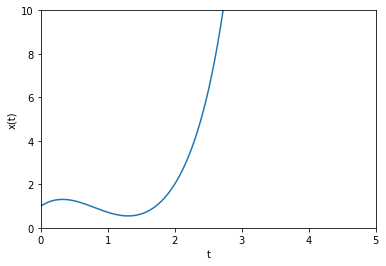

In [ ]:
# Cara manual
from numpy import exp, sin, cos, sqrt
ts = np.linspace(0, 5, 400)

def f(t):
    return (21*exp(11*t/4) + 242*sqrt(7)*sin(3*sqrt(7)*t/4) + 462*cos(3*sqrt(7)*t/4))*exp(-3*t/4)/483

plt.plot(ts, f(ts))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.xlim([0, 5])
plt.ylim([0, 10])
plt.show()

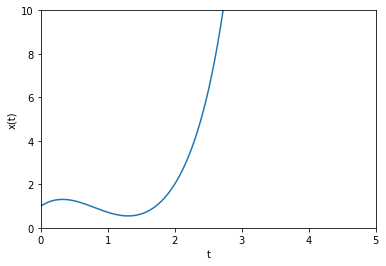

In [ ]:
# Menggunakan Lambdify
f2 = lambdify(t, sol_1)

plt.plot(ts, f2(ts))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.xlim([0, 5])
plt.ylim([0, 10])
plt.show()

## **3.2 Sistem Pegas-Massa-Redaman**

### **Definisi**
Sistem pegas-massa-redaman dapat dimodelkan oleh persamaan diferensial menjadi suatu masalah nilai awal:
\begin{equation*}
mx'' + cx' + kx=F(t), \hspace{0.5cm} x(0)=x_0, x'(0)=v_0
\end{equation*}
dengan 


### **Contoh Kasus**
 Pilih $m=1, c=0, k=1, F(t)=\cos(t), x_0=0$ dan $v_0=1$. 
 
 Diberikan masalah nilai awal sebagai:
\begin{equation*}
    x''+ x=\cos(t), \hspace{0.5cm} x(0)=0, x'(0)=1
\end{equation*}
dengan solusi sebagai berikut:

In [ ]:
x = Function('x')

sol_spring = dsolve(Derivative(x(t), t, t) + x(t) - cos(t), x(t)).rhs 
cond_spring_1 = Eq(sol_spring.subs(t, 0), 0)          # Kondisi 1
cond_spring_2 = Eq(sol_spring.diff(t).subs(t, 0), 1)  # Kondisi 2

C1, C2 = symbols("C1, C2") # Menyatakan C1 dan C2 sebagai simbol
C1C2_spring_sol = solve([cond_spring_1, cond_spring_2], (C1, C2)) # Memperoleh nilai konstanta C1 dan C2 pada C1C2_sol
sol_spring_1 = simplify(sol_spring.subs(C1C2_spring_sol)) # Substitusi nilai konstanta yang didapatkan pada solusi umum

print(sol_spring_1)


(t/2 + 1)*sin(t)


Diperoleh grafik solusi sebagai berikut.

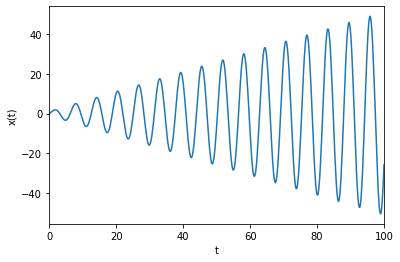

In [ ]:
f_spring = lambdify(t, sol_spring_1)
ts_sp = np.linspace(0, 100, 500)
plt.plot(ts_sp, f_spring(ts_sp))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.xlim([0, 100])
plt.show()

 Nilai gaya luar $F(t)=\cos(t)$ memberikan hasil simpangan yang semakin besar seiring waktu membesar (resonansi).
    
Bagaimana jika gaya luar diganti menjadi $F(t)=\cos(\frac{t}{2})$? atau $F(t)=\sin(t)$?

### **Kurva Amplop**

Kurva Amplop atau *envelope-curve* merupakan suatu fungsi/kurva yang membatasi grafik solusi persamaan diferensial. 

Untuk kasus diatas, perhatikan bahwa solusi yang diberikan merupakan gelombang monokromatik (sinus/kosinus dengan 1 frekuensi). 

Misalkan solusi khususnya adalah:
\begin{equation*}
    x(t) = \xi(t) \sin(t)
\end{equation*}
atau 
\begin{equation*}
    x(t) = \xi(t)\cos(t)
\end{equation*}
Maka kurva amplop dari solusi $x(t)$ adalah fungsi $\pm\xi(t)$.

Jika solusi $x(t)$ tidak sederhana, seperti $x(t)=A(t)\cos(t) + B(t)\sin(t)$.

Perhatikan bahwa bentuk tersebut dapat dituliskan ulang sebagai 
\begin{equation*}
    x(t) = K(t) \cos(t-\alpha)
\end{equation*}
dengan $K(t) = \sqrt{A(t)^2 + B(t)^2}$ dan $\alpha = \arctan\left(\dfrac{B(t)}{A(t)}\right)$. 

Kurva amplop untuk $x(t)$ ialah $\pm K(t)$.

### **Contoh Kurva Amplop**
Pandang solusi $x(t) = \sin(t)(1+\frac{t}{2})$ dari bagian sebelumnya. Perhatikan bahwa garis $\pm (1+\frac{t}{2})$ merupakan kurva amplop dari solusi tersebut.


Kurva amplop ini dapat menjadi indikasi munculnya fenomena resonansi atau tidak.

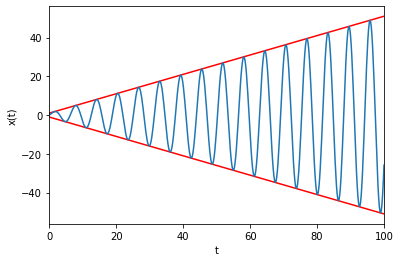

In [ ]:
env = lambda t : 1 + t/2
plt.plot(ts_sp, env(ts_sp), 'r')
plt.plot(ts_sp, -env(ts_sp), 'r')
plt.plot(ts_sp, f_spring(ts_sp))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.xlim([0, 100])
plt.show()